In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
path = "Heart_Disease_Prediction.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Step 1: Basic dataset inspection

In [4]:
#Check dataset shape (rows, columns)
print(f"Shape of Dataset is: {df.shape}\n")
#Get Columns names
print(f"Names of the columns present in the Dateset is:\n{df.columns}\n")
#Get data types & missing values info
print(f"Info on Dataset is:")
df.info()

Shape of Dataset is: (270, 14)

Names of the columns present in the Dateset is:
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

Info on Dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exe

STep 2: Understand the target variable

In [5]:
#Check unique values in target
print(f"Unique values in \"Heart Disease\" Columns is: {df['Heart Disease'].unique()}\n")
#Count of each class
print(f"Count of each unique value in \"Heart Disease\" Column:\n{df['Heart Disease'].value_counts()}\n")
#Percentage Distribution
print(f"Percantage distribution of class in \"Heart Disease\" Column:\n{df['Heart Disease'].value_counts(normalize=True)*100}\n")


Unique values in "Heart Disease" Columns is: ['Presence' 'Absence']

Count of each unique value in "Heart Disease" Column:
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

Percantage distribution of class in "Heart Disease" Column:
Heart Disease
Absence     55.555556
Presence    44.444444
Name: proportion, dtype: float64



Step 3: Visualize the target variable

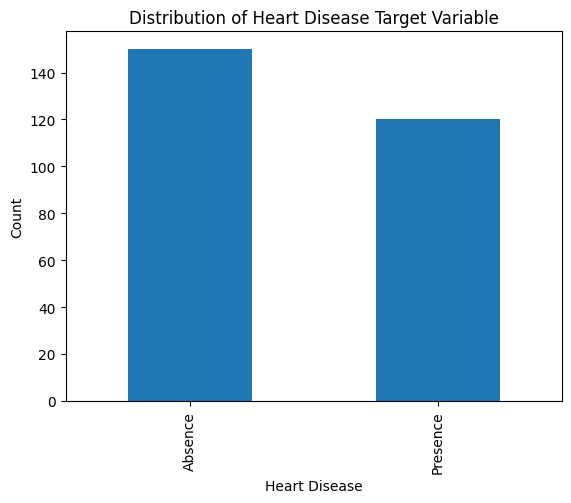

In [6]:
#Plot target variable distribution
df['Heart Disease'].value_counts().plot(kind='bar')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Target Variable')
plt.show()

Step 4: Encode the target variable which is "Heart Disease" Column

In [7]:
#Encode target variable
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})
#Verify encoding
df['Heart Disease'].value_counts()

Heart Disease
0    150
1    120
Name: count, dtype: int64

Step 5: Analyze Age (Important medical feature)

In [8]:
#Summary statistics for Age Columns
print(f"Summary for \"Age\" Columns:\n{df['Age'].describe()}")

Summary for "Age" Columns:
count    270.000000
mean      54.433333
std        9.109067
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64


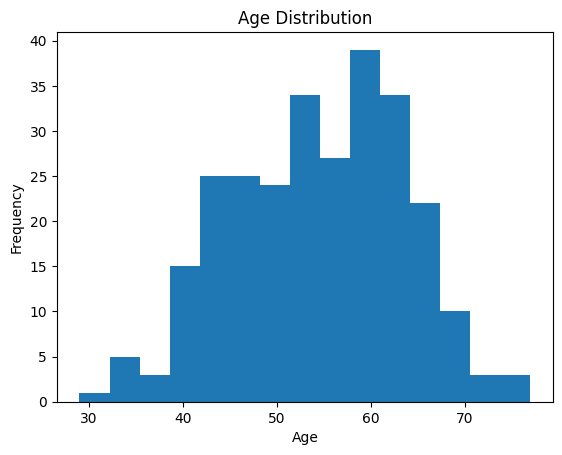

In [9]:
#Plot Age Distribution
plt.hist(df['Age'], bins=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [10]:
#Mean age by heart disease status
df.groupby('Heart Disease')['Age'].mean()

Heart Disease
0    52.706667
1    56.591667
Name: Age, dtype: float64

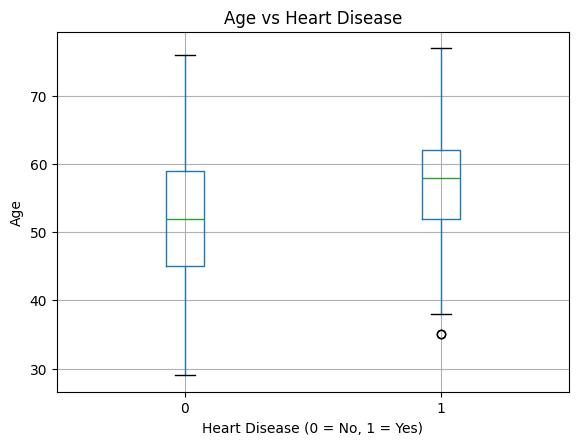

In [11]:
#Boxplot: Age vs Heart Disease
df.boxplot(column='Age', by='Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.title('Age vs Heart Disease')
plt.suptitle('')
plt.show()

Step 6: Sex vs Heart Disease

In [12]:
#Check unique values in Sex Columns
print(f"In \"Sex\" Column, 0 represents female, & 1 reperesents male\n")
print(f"Unique values in \"Sex\" Column are:\n{df['Sex'].unique()}\n")
#Count of males vs females
print(f"Count of males & female are:\n{df['Sex'].value_counts()}\n")

In "Sex" Column, 0 represents female, & 1 reperesents male

Unique values in "Sex" Column are:
[1 0]

Count of males & female are:
Sex
1    183
0     87
Name: count, dtype: int64



In [13]:
#Heart Disease count by sex
print(f"Heart Disease Count by Sex is:")
print(pd.crosstab(df['Sex'], df['Heart Disease']))
#Heart Disease percentage by sex
print(f"\nHeart Disease percentage by sex:")
print(pd.crosstab(df['Sex'], df['Heart Disease'], normalize='index')*100)

Heart Disease Count by Sex is:
Heart Disease   0    1
Sex                   
0              67   20
1              83  100

Heart Disease percentage by sex:
Heart Disease          0          1
Sex                                
0              77.011494  22.988506
1              45.355191  54.644809


The dataset shows a significantly higher prevalence of heart disease among males (≈55%) compared to females (≈23%), indicating sex as a strong risk factor.

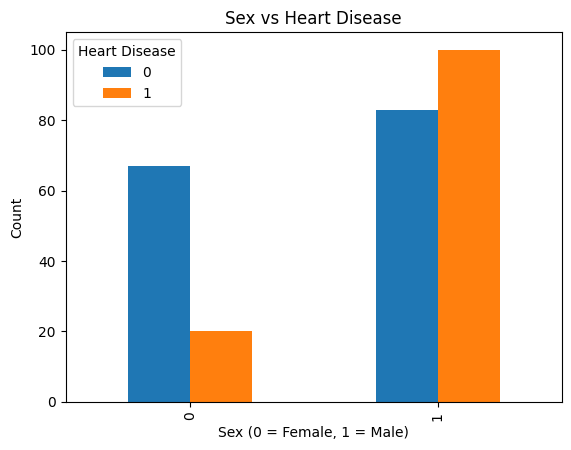

In [41]:
# Bar plot Sex vs Heart Disease
pd.crosstab(df['Sex'], df['Heart Disease']).plot(kind='bar')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.title('Sex vs Heart Disease')
plt.show()

Step 7: Chest Pain Type Analysis

In [14]:
print(f"Type of chest pain:\n1: Typical angina, 2: Atypical angina, 3: Non-anginal pain, 4: Asymptomatic\n")
#Distribution of chest pain types
df['Chest pain type'].value_counts().sort_index()

Type of chest pain:
1: Typical angina, 2: Atypical angina, 3: Non-anginal pain, 4: Asymptomatic



Chest pain type
1     20
2     42
3     79
4    129
Name: count, dtype: int64

In [15]:
#Heart disease count by chest pain type
print(f"Heart disease count by chest pain type")
print(pd.crosstab(df['Chest pain type'], df['Heart Disease']))
#Heart disease percantage by chest pain type
print(f"\nHeart disease percentage by chest pain type")
print(pd.crosstab(df['Chest pain type'], df['Heart Disease'], normalize='index')*100)


Heart disease count by chest pain type
Heart Disease     0   1
Chest pain type        
1                15   5
2                35   7
3                62  17
4                38  91

Heart disease percentage by chest pain type
Heart Disease            0          1
Chest pain type                      
1                75.000000  25.000000
2                83.333333  16.666667
3                78.481013  21.518987
4                29.457364  70.542636


Asymptomatic chest pain (type 4) shows a very high association with heart disease, with over 70% of patients diagnosed, making it one of the strongest predictors in the dataset.

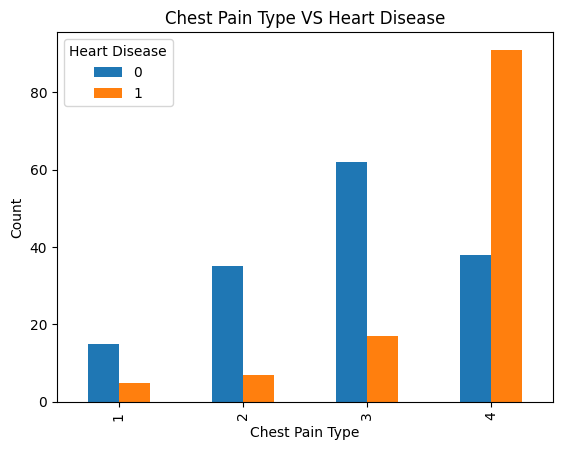

In [42]:
# Bar plot Chest pain type vs Heart Disease
pd.crosstab(df['Chest pain type'], df['Heart Disease']).plot(kind='bar')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Chest Pain Type VS Heart Disease')
plt.show()

Step 8: Blood Pressure (BP) Analysis

In [16]:
#Summary statistics for Blood Pressure
df['BP'].describe()

count    270.000000
mean     131.344444
std       17.861608
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: BP, dtype: float64

In [17]:
#Mean BP by heart disease statue
print(f"Mean BP by heart disease statue:")
print(df.groupby('Heart Disease')['BP'].mean())
#Median BP by heart disease statue
print(f"\nMedian BP by heart disease statue:")
print(df.groupby('Heart Disease')["BP"].median())

Mean BP by heart disease statue:
Heart Disease
0    128.866667
1    134.441667
Name: BP, dtype: float64

Median BP by heart disease statue:
Heart Disease
0    130.0
1    130.0
Name: BP, dtype: float64


Blood pressure shows a modest increase in patients with heart disease, suggesting it contributes to risk but is not a strong standalone predictor

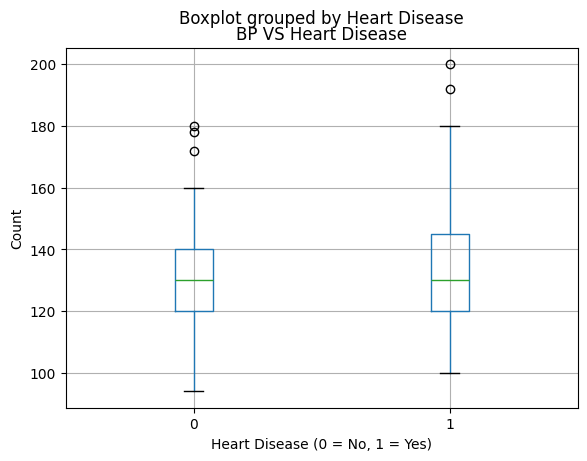

In [ ]:
# Bar plot BP vs Heart Disease
df.boxplot(column='BP', by='Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Blood Pressure')
plt.title('BP VS Heart Disease')
plt.show()

Step 9: Cholesterol Analysis

In [18]:
#Summary statistics for Cholesterol
#Summary statistics for cholesterol
print(f"Summary of \"Cholesterol\" Column:\n{df['Cholesterol'].describe()}")

Summary of "Cholesterol" Column:
count    270.000000
mean     249.659259
std       51.686237
min      126.000000
25%      213.000000
50%      245.000000
75%      280.000000
max      564.000000
Name: Cholesterol, dtype: float64


In [19]:
#Mean cholesterol by heart disease status
print(f"Mean cholesterol by heart disease status:\n{df.groupby('Heart Disease')['Cholesterol'].mean()}\n")
#Median cholesterol by heart disease status
print(f"Median cholesterol by heart disease status:\n{df.groupby('Heart Disease')['Cholesterol'].median()}\n")

Mean cholesterol by heart disease status:
Heart Disease
0    244.213333
1    256.466667
Name: Cholesterol, dtype: float64

Median cholesterol by heart disease status:
Heart Disease
0    236.0
1    255.5
Name: Cholesterol, dtype: float64



Patients with heart disease exhibit higher median and mean cholesterol levels, indicating a moderate association with cardiovascular risk.

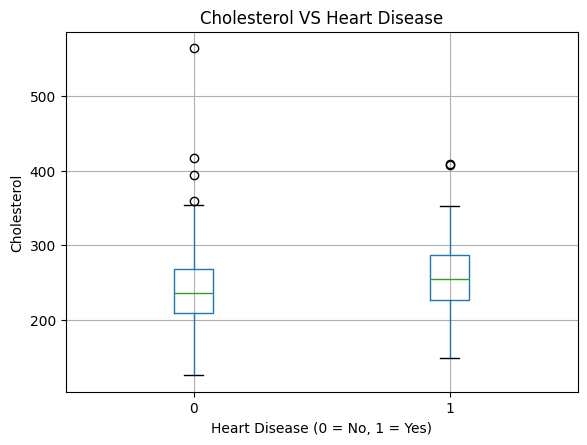

In [47]:
# Bar plot Cholesterol vs Heart Disease
df.boxplot(column='Cholesterol', by='Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol')
plt.title('Cholesterol VS Heart Disease')
plt.suptitle('')
plt.show()

Step 10: Max Heart Rate (Important Feature)

In [23]:
#Summary statistics for Max Heart Rate
print(f"Here \"HR\" means Heart Rate")
print(f"Summary statistics of \"Max HR\" Column:\n{df['Max HR'].describe()}")

Here "HR" means Heart Rate
Summary statistics of "Max HR" Column:
count    270.000000
mean     149.677778
std       23.165717
min       71.000000
25%      133.000000
50%      153.500000
75%      166.000000
max      202.000000
Name: Max HR, dtype: float64


In [24]:
#Mean Max HR by heart disease status
print(f"Mean Max HR by heart disease status:\n{df.groupby('Heart Disease')['Max HR'].mean()}\n")
#Median Max HR by heart disease status
print(f"Median Max HR by heart disease status:\n{df.groupby('Heart Disease')['Max HR'].median()}\n")

Mean Max HR by heart disease status:
Heart Disease
0    158.333333
1    138.858333
Name: Max HR, dtype: float64

Median Max HR by heart disease status:
Heart Disease
0    161.0
1    141.5
Name: Max HR, dtype: float64



Maximum heart rate shows a strong inverse association with heart disease, with affected patients exhibiting significantly lower peak heart rates.

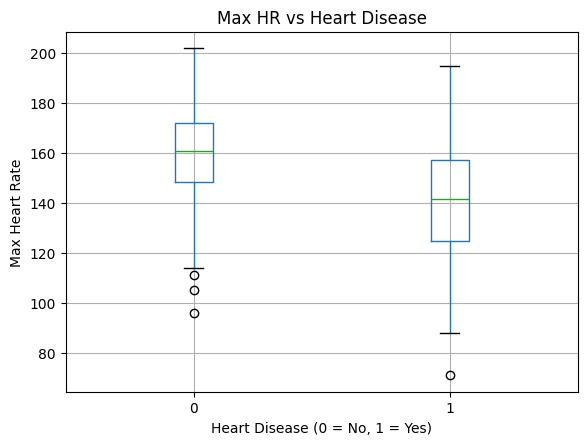

In [48]:
#Boxplot of Max HR vs Heart Disease
df.boxplot(column='Max HR', by='Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Max Heart Rate')
plt.title('Max HR vs Heart Disease')
plt.suptitle('')
plt.show()

Step 11: Exercise-Induced Angina

In [26]:
# Distribution of Exercise Angina
print(f"In \"Exercise Angina\" COlumn:\n0 means No\n1 means Yes\n")
print(f"Distribution of \"Exerice Angina\" Column Values:\n{df['Exercise angina'].value_counts()}\n")


In "Exercise Angina" COlumn:
0 means No
1 means Yes

Distribution of "Exerice Angina" Column Values:
Exercise angina
0    181
1     89
Name: count, dtype: int64



In [27]:
#Heart disease count by Exercise Angina
print(f"Heart disease count by Exercise Angina")
print(pd.crosstab(df['Exercise angina'], df['Heart Disease']))
#Heart disease percantage by Exercise Angina
print(f"\nHeart disease percentage by Exercise Angina")
print(pd.crosstab(df['Exercise angina'], df['Heart Disease'], normalize='index')*100)


Heart disease count by Exercise Angina
Heart Disease      0   1
Exercise angina         
0                127  54
1                 23  66

Heart disease percentage by Exercise Angina
Heart Disease            0          1
Exercise angina                      
0                70.165746  29.834254
1                25.842697  74.157303


Exercise-induced angina shows a strong association with heart disease, with over 74% of affected individuals diagnosed positive.

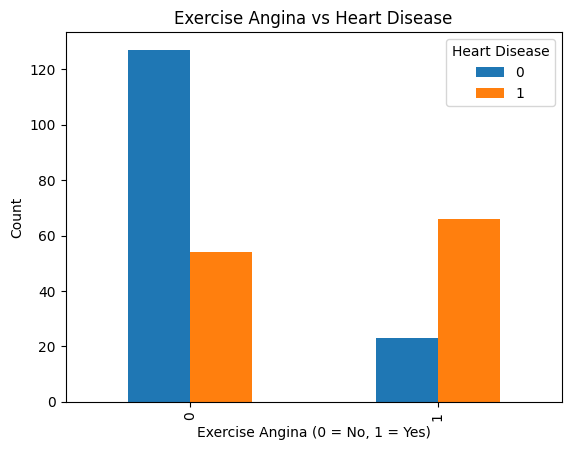

In [50]:
#Bar plot of Exercise Angina vs Heart Disease
pd.crosstab(df['Exercise angina'], df['Heart Disease']).plot(kind='bar')
plt.xlabel('Exercise Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Exercise Angina vs Heart Disease')
plt.show()

Step 12: ST Depression 

In [29]:
#Summary statistics for ST depression
print(f"Summary statistics for ST depression:\n{df['ST depression'].describe()}\n")

Summary statistics for ST depression:
count    270.00000
mean       1.05000
std        1.14521
min        0.00000
25%        0.00000
50%        0.80000
75%        1.60000
max        6.20000
Name: ST depression, dtype: float64



In [ ]:
#ST Depression VS Heart Disease
#Mean ST depression by heart disease status
print(f"Mean ST depression by heart disease status:\n{df.groupby('Heart Disease')['ST depression'].mean()}\n")
#Median ST depression by heart disease status
print(f"Median ST depression by heart disease status:\n{df.groupby('Heart Disease')['ST depression'].median()}\n")

Mean ST depression by heart disease status:
Heart Disease
0    0.622667
1    1.584167
Name: ST depression, dtype: float64

Median ST depression by heart disease status:
Heart Disease
0    0.2
1    1.4
Name: ST depression, dtype: float64



ST depression shows a strong positive association with heart disease, indicating increased myocardial ischemia among affected patients

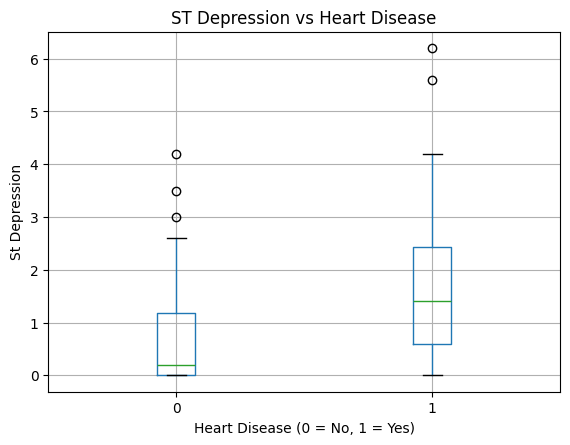

In [53]:
#Boxplot of St Depression vs Heart Disease
df.boxplot(column='ST depression', by='Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('St Depression')
plt.title('ST Depression vs Heart Disease')
plt.suptitle('')
plt.show()

In [31]:
#Distribution of Slope of ST
print(f"Distribution of \"Slope of ST\" Column:\n{df['Slope of ST'].value_counts().sort_index()}")

Distribution of "Slope of ST" Column:
Slope of ST
1    130
2    122
3     18
Name: count, dtype: int64


In [32]:
#Heart disease count by Slope of ST
print(f"Heart disease count by Slope of ST")
print(pd.crosstab(df['Slope of ST'], df['Heart Disease']))
#Heart disease percantage by Slope of ST
print(f"\nHeart disease percentage by Slope of ST")
print(pd.crosstab(df['Slope of ST'], df['Heart Disease'], normalize='index')*100)


Heart disease count by Slope of ST
Heart Disease   0   1
Slope of ST          
1              98  32
2              44  78
3               8  10

Heart disease percentage by Slope of ST
Heart Disease          0          1
Slope of ST                        
1              75.384615  24.615385
2              36.065574  63.934426
3              44.444444  55.555556


Flat and downsloping ST segments show a significantly higher prevalence of heart disease compared to upsloping segments

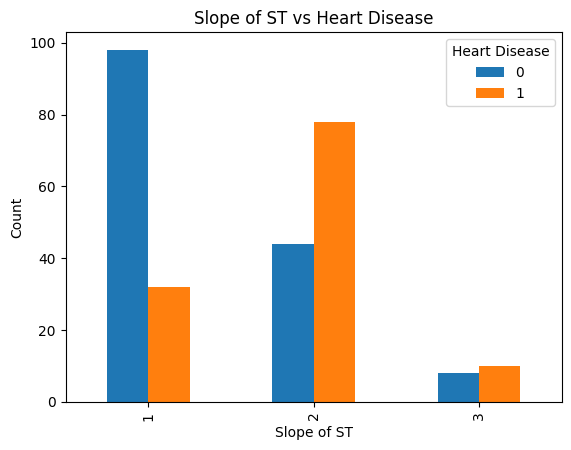

In [56]:
#Bar plot of Slope of ST vs Heart Disease
pd.crosstab(df['Slope of ST'], df['Heart Disease']).plot(kind='bar')
plt.xlabel('Slope of ST')
plt.ylabel('Count')
plt.title('Slope of ST vs Heart Disease')
plt.show()

Step 14: Number of Major Vessels (0-3) fluoroscopy

In [34]:
#Distribution of number of vessels
print(f"Value range of \"Number of vessels fluro\" is from 0 to 3\n")
print(f"Distribution of number of vessels:\n{df['Number of vessels fluro'].value_counts().sort_index()}\n")


Value range of "Number of vessels fluro" is from 0 to 3

Distribution of number of vessels:
Number of vessels fluro
0    160
1     58
2     33
3     19
Name: count, dtype: int64



In [35]:
#Heart disease count by Number of vessels 
print(f"Heart disease count by Number of vessels fluro")
print(pd.crosstab(df['Number of vessels fluro'], df['Heart Disease']))
#Heart disease percantage by Number of vessels fluro
print(f"\nHeart disease percentage by Number of vessels fluro")
print(pd.crosstab(df['Number of vessels fluro'], df['Heart Disease'], normalize='index')*100)


Heart disease count by Number of vessels fluro
Heart Disease              0   1
Number of vessels fluro         
0                        120  40
1                         20  38
2                          7  26
3                          3  16

Heart disease percentage by Number of vessels fluro
Heart Disease                    0          1
Number of vessels fluro                      
0                        75.000000  25.000000
1                        34.482759  65.517241
2                        21.212121  78.787879
3                        15.789474  84.210526


The number of major vessels shows a strong positive association with heart disease, with risk increasing sharply as vessel count rises.

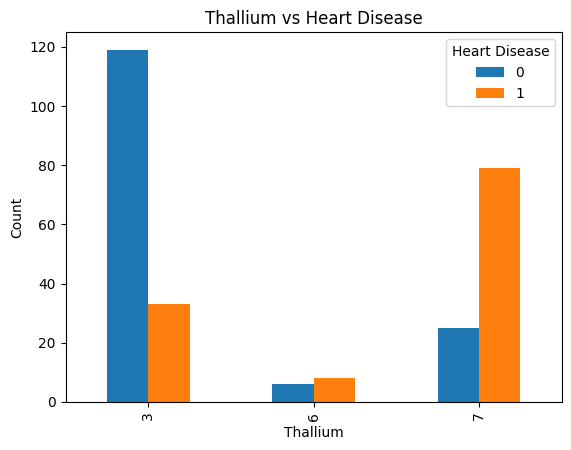

In [57]:
#Bar plot of Thallium vs Heart Disease
pd.crosstab(df['Thallium'], df['Heart Disease']).plot(kind='bar')
plt.xlabel('Thallium')
plt.ylabel('Count')
plt.title('Thallium vs Heart Disease')
plt.show()

Step 15: Thallium Scan Analysis

In [36]:
#Distribution of Thallium Column values
print(f"Distribution of Thallium Column values:\n{df['Thallium'].value_counts().sort_index()}\n")


Distribution of Thallium Column values:
Thallium
3    152
6     14
7    104
Name: count, dtype: int64



In [39]:
#Heart disease count by Thallium
print(f"Heart disease count by Thallium")
print(pd.crosstab(df['Thallium'], df['Heart Disease']))
#Heart disease percantage by Thallium
print(f"\nHeart disease percentage by Thallium")
print(pd.crosstab(df['Thallium'], df['Heart Disease'], normalize='index')*100)


Heart disease count by Thallium
Heart Disease    0   1
Thallium              
3              119  33
6                6   8
7               25  79

Heart disease percentage by Thallium
Heart Disease          0          1
Thallium                           
3              78.289474  21.710526
6              42.857143  57.142857
7              24.038462  75.961538


Abnormal thallium scans dramatically increase disease risk. Reversible defects are especially dangerous

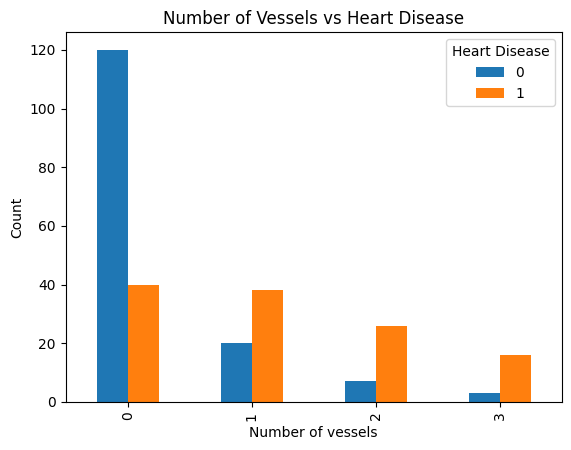

In [58]:
#Bar plot of Number of vessels fluro vs Haert Disease
pd.crosstab(df['Number of vessels fluro'], df['Heart Disease']).plot(kind='bar')
plt.xlabel('Number of vessels')
plt.ylabel('Count')
plt.title('Number of Vessels vs Heart Disease')
plt.show()

FINAL EDA SUMMARY (Professional, Interview-Ready)

**Strongest Predictors**
1). Number of vessels (fluoroscopy) – strongest monotonic risk
2). Thallium scan
3). Chest pain type (Asymptomatic)
4). Exercise-induced angina
5). ST depression
6). Max heart rate (inverse relationship)

**Moderate Predictors**
1). Age
2). Sex (male higher risk)
3). Cholesterol
4). Blood pressure

**Weaker / supportive**
1). FBS over 120
2). EKG results (useful with others)

**Key Insight**:
Heart disease risk increases sharply with asymptomatic chest pain, reduced exercise capacity, ST abnormalities, vessel blockage, and abnormal thallium scans.